In [1]:
import os


In [2]:
# copy data from google drive
!cp /content/drive/MyDrive/LDS8_new_content/b7_employ_multiple/data/logo_dataset.zip ./dataset.zip

In [23]:
# extract the dataset
!unzip dataset.zip

Archive:  dataset.zip
  inflating: logo_dataset/train/images/106523337.jpg  
  inflating: logo_dataset/train/images/1075391489.jpg  
  inflating: logo_dataset/train/images/108232382.jpg  
  inflating: logo_dataset/train/images/108232417.jpg  
  inflating: logo_dataset/train/images/109950015.jpg  
  inflating: logo_dataset/train/images/110022360.jpg  
  inflating: logo_dataset/train/images/1107796028.jpg  
  inflating: logo_dataset/train/images/1111800334.jpg  
  inflating: logo_dataset/train/images/111389662.jpg  
  inflating: logo_dataset/train/images/115519078.jpg  
  inflating: logo_dataset/train/images/117933049.jpg  
  inflating: logo_dataset/train/images/1201452086.jpg  
  inflating: logo_dataset/train/images/1224626332.jpg  
  inflating: logo_dataset/train/images/1224628248.jpg  
  inflating: logo_dataset/train/images/1230939811.jpg  
  inflating: logo_dataset/train/images/123937306.jpg  
  inflating: logo_dataset/train/images/1251769192.jpg  
  inflating: logo_dataset/train/ima

In [5]:
# train, val split
import pandas as pd
all_i = os.listdir("/content/logo_dataset/train/images")
imgs = []
labels = []
for img in all_i:
    imgs.append(img)
    labels.append(img.replace("jpg","txt"))
data = pd.DataFrame({"img":imgs,"label":labels})

In [22]:
X_test

,img,label
423,4316401444.jpg,4316401444.txt
548,43671206.jpg,43671206.txt
730,3193687005.jpg,3193687005.txt
588,3948869874.jpg,3948869874.txt
830,2801900357.jpg,2801900357.txt
...,...,...
841,3580857943.jpg,3580857943.txt
914,2790511610.jpg,2790511610.txt
752,3422008846.jpg,3422008846.txt
409,4537970631.jpg,4537970631.txt


# 1. Split and Prepare Data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,data, test_size=0.2, random_state=42)

In [11]:
os.mkdir("dataset")
os.mkdir("dataset/images")
os.mkdir("dataset/images/train")
os.mkdir("dataset/images/valid")
os.mkdir("dataset/labels")
os.mkdir("dataset/labels/train")
os.mkdir("dataset/labels/valid")

In [12]:
import shutil

def move(data, img_path, label_path):
    # Iterate through the DataFrame rows
    for index, row in data.iterrows():
        img_file = row['img']
        label_file = row['label']
        img_file = os.path.join("/content/logo_dataset/train/images",img_file)
        label_file = os.path.join("/content/logo_dataset/train/labels",label_file)
        # Check if the files exist
        if os.path.isfile(img_file) and os.path.isfile(label_file):
            # Construct the new file paths in the target directories
            new_img_path = os.path.join(img_path, os.path.basename(img_file))
            new_label_path = os.path.join(label_path, os.path.basename(label_file))

            # Move the files to the target directories
            shutil.move(img_file, new_img_path)
            shutil.move(label_file, new_label_path)

            print(f"Moved '{img_file}' to '{new_img_path}'")
            print(f"Moved '{label_file}' to '{new_label_path}'")
        else:
            print(f"File not found: '{img_file}' or '{label_file}'")

In [ ]:
move(X_train,"dataset/images/train","dataset/labels/train")

In [24]:
move(X_test,"dataset/images/valid","dataset/labels/valid")

Moved '/content/logo_dataset/train/images/4316401444.jpg' to 'dataset/images/valid/4316401444.jpg'
Moved '/content/logo_dataset/train/labels/4316401444.txt' to 'dataset/labels/valid/4316401444.txt'
Moved '/content/logo_dataset/train/images/43671206.jpg' to 'dataset/images/valid/43671206.jpg'
Moved '/content/logo_dataset/train/labels/43671206.txt' to 'dataset/labels/valid/43671206.txt'
Moved '/content/logo_dataset/train/images/3193687005.jpg' to 'dataset/images/valid/3193687005.jpg'
Moved '/content/logo_dataset/train/labels/3193687005.txt' to 'dataset/labels/valid/3193687005.txt'
Moved '/content/logo_dataset/train/images/3948869874.jpg' to 'dataset/images/valid/3948869874.jpg'
Moved '/content/logo_dataset/train/labels/3948869874.txt' to 'dataset/labels/valid/3948869874.txt'
Moved '/content/logo_dataset/train/images/2801900357.jpg' to 'dataset/images/valid/2801900357.jpg'
Moved '/content/logo_dataset/train/labels/2801900357.txt' to 'dataset/labels/valid/2801900357.txt'
Moved '/content/lo

# 2. Train Object Detection Model

In [ ]:
!pip install ultralytics

In [18]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolov8s.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

In [19]:
config_content = """path: /content/dataset  # dataset root dir
train: images/train  # train images (relative to 'path') 128 images
val: images/valid  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
names:
  0: logo
"""
with open("/content/data_face_config.yaml", "w") as fw:
  fw.write(config_content)


In [26]:
model.train(data="/content/data_face_config.yaml", epochs=30, single_cls=True)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data_face_config.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 9.1s, saved as 'runs/detect/train2/weights/best.onnx' (42.6 MB)

Export complete (11.2s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.onnx imgsz=640 data=/content/data_face_config.yaml  
Visualize:       https://netron.app


In [ ]:
model = YOLO("runs/detect/train2/weights/best.onnx")


In [31]:
results = model.predict("/content/real_test", save=True, conf=0.5)


image 1/5 /content/real_test/coca-cola-0906.jpg: 640x640 1 logo, 373.8ms
image 2/5 /content/real_test/coca.jpg: 640x640 (no detections), 343.5ms
image 3/5 /content/real_test/coca1.jpg: 640x640 (no detections), 314.0ms
image 4/5 /content/real_test/maxresdefault.jpg: 640x640 1 logo, 310.6ms
image 5/5 /content/real_test/pepsi-sign-on-building-roof-B56FDH.jpg: 640x640 1 logo, 299.9ms
Speed: 3.7ms preprocess, 328.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


# 1.1 How to get prediction from a YOLO model?

In [33]:
# get yolov8 prediction
results = model(["/content/real_test/coca-cola-0906.jpg"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes.xyxy  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    print(boxes)



0: 640x640 1 logo, 992.5ms
Speed: 11.1ms preprocess, 992.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


tensor([[237.0093, 338.2327, 441.3962, 410.2002]])


In [35]:
box = boxes.numpy()

In [38]:
import numpy as np
box = np.reshape(box,(4))

In [40]:
xmin,ymin,xmax,ymax=box

In [44]:
xmin = int(xmin)
ymin = int(ymin)
xmax = int(xmax)
ymax = int(ymax)
print(xmin,ymin,xmax,ymax)

237 338 441 410


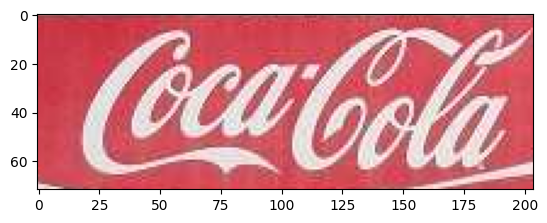

In [45]:
from PIL import Image
from matplotlib import pyplot as plt
im = Image.open("/content/real_test/coca-cola-0906.jpg")
im = np.array(im)
cropped =  im[ymin:ymax, xmin:xmax]
plt.imshow(cropped)

# 2. Logo Classification

In [47]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [48]:
!wget http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz

--2023-10-07 15:57:50--  http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
Resolving image.ntua.gr (image.ntua.gr)... 147.102.11.1
Connecting to image.ntua.gr (image.ntua.gr)|147.102.11.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101827904 (97M) [application/x-gzip]
Saving to: ‘flickr_logos_27_dataset.tar.gz’

flickr_logos_27_dat 100%[===================>]  97.11M  15.8MB/s    in 11s     

2023-10-07 15:58:02 (8.71 MB/s) - ‘flickr_logos_27_dataset.tar.gz’ saved [101827904/101827904]



# 2.1 Prepare Data

In [49]:
import tarfile

fname = 'flickr_logos_27_dataset.tar.gz'

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()

In [50]:
fname = 'flickr_logos_27_dataset/flickr_logos_27_dataset_images.tar.gz'

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()

In [51]:
import os
src_dir = "flickr_logos_27_dataset_images"
dest = "LOGOS"

if not os.path.exists(dest):
    os.makedirs(dest)

In [52]:
df = pd.read_csv("./flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+',header=None)

In [53]:
df

,0,1,2,3,4,5,6
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93
...,...,...,...,...,...,...,...
4531,2126991906.jpg,Yahoo,6,15,6,253,54
4532,217288720.jpg,Yahoo,6,136,161,304,222
4533,2472817996.jpg,Yahoo,6,2,4,499,106
4534,2514220918.jpg,Yahoo,6,1,69,342,157


In [66]:
data = pd.DataFrame()
data['path'] = df[0]
data['label'] = df[1]

In [67]:
## mapping data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.label = le.fit_transform(data.label)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,data, test_size=0.2, random_state=42)

# 2.2. Can You Build A classification model?

## 2.2.1. Dataset and DataLoader

In [63]:
from PIL import Image
import os
import torch
from sklearn.model_selection import train_test_split

# define a data class
class ClassificationDataset:
    def __init__(self, data, data_path, transform, training=True):
        """Define the dataset for classification problems

        Args:
            data ([dataframe]): [a dataframe that contain 2 columns: image name and label]
            data_path ([str]): [path/to/folder that contains image file]
            transform : [augmentation methods and transformation of images]
            training (bool, optional): []. Defaults to True.
        """
        self.data = data
        self.imgs = data["path"].unique().tolist()
        self.data_path = data_path
        self.training = training
        self.transform = transform

    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.data_path, self.data.iloc[idx, 0]))
        label = self.data.iloc[idx, 1]
        if self.transform is not None:
            img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.imgs)

In [64]:
import torchvision.transforms as transform
import torchvision
transformer = transform.Compose([
                           transform.Resize((224, 224)),
                           transform.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                           transform.RandomRotation(5),
                           transform.RandomAffine(degrees=11, translate=(0.1,0.1), scale=(0.8,0.8)),
                           transform.ToTensor(),
                           transform.Normalize((0.5, 0.5, 0.5),
                                               (0.5, 0.5, 0.5))
])

test_transform = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),
                                               torchvision.transforms.ToTensor(),
                                              transform.Normalize((0.5, 0.5, 0.5),
                                               (0.5, 0.5, 0.5))])

In [72]:
testset = ClassificationDataset(X_test,data_path = "/content/flickr_logos_27_dataset_images",transform=test_transform,training=True)
val_loader = torch.utils.data.DataLoader(
        testset, batch_size=1, shuffle=False,
    )

In [71]:
trainset = ClassificationDataset(X_train,data_path = "/content/flickr_logos_27_dataset_images",transform=transformer,training=True)
train_loader = torch.utils.data.DataLoader(
        trainset, batch_size=16, shuffle=False,
    )

## 2.2.2 Metrics, Loss function

In [73]:
from sklearn import metrics as skmetrics
import numpy
class Metrics:
    def __init__(self, metric_names):
        self.metric_names = metric_names
        # initialize a metric dictionary
        self.metric_dict = {metric_name: [0] for metric_name in self.metric_names}

    def step(self, labels, preds):
        for metric in self.metric_names:
            # get the metric function
            do_metric = getattr(
                skmetrics, metric, "The metric {} is not implemented".format(metric)
            )
            # check if metric require average method, if yes set to 'micro' or 'macro' or 'None'
            try:
                self.metric_dict[metric].append(
                    do_metric(labels, preds, average="macro")
                )
            except:
                self.metric_dict[metric].append(do_metric(labels, preds))

    def epoch(self):
        # calculate metrics for an entire epoch
        avg = [sum(metric) / (len(metric) - 1) for metric in self.metric_dict.values()]
        metric_as_dict = dict(zip(self.metric_names, avg))
        return metric_as_dict

    def last_step_metrics(self):
        # return metrics of last steps
        values = [self.metric_dict[metric][-1] for metric in self.metric_names]
        metric_as_dict = dict(zip(self.metric_names, values))
        return metric_as_dict

In [74]:
train_metrics = Metrics(["accuracy_score","f1_score"])
val_metrics = Metrics(["accuracy_score","f1_score"])

In [75]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torch import nn
criterion = nn.CrossEntropyLoss()

In [76]:
np.unique(data.label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

## 2.2.3 Model, Optimizer and Training

In [77]:
from torchvision import models
from torch import nn
model = models.efficientnet_b4(pretrained=True).cuda()
for param in model.parameters():
    param.requires_grad = False
classifier = nn.Sequential(
    nn.Linear(in_features=model.classifier[1].in_features, out_features=256,bias=True),
    nn.Linear(in_features=256, out_features=27,bias=True)
)
model.classifier  = classifier

Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-7eb33cd5.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-7eb33cd5.pth
100%|██████████| 74.5M/74.5M [00:00<00:00, 111MB/s]


In [78]:
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, "min", patience=2, factor=0.5
    )

In [79]:
model = model.to(device)
def train_one_epoch(
    model,
    train_loader,
    test_loader,
    device,
    optimizer,
    criterion,
    train_metrics,
    val_metrics,
):

    # training-the-model
    train_loss = 0
    valid_loss = 0
    all_labels = []
    all_preds = []
    model.train()
    for data, target in train_loader:
        # move-tensors-to-GPU
        data = data.type(torch.FloatTensor).to(device)
        # target=torch.Tensor(target)
        target = target.float().to(device)
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        # get the prediction label and target label
        output = model(data)
        preds = torch.argmax(output, axis=1).cpu().detach().numpy()
        labels = target.cpu().numpy()
        # calculate-the-batch-loss
        loss = criterion(output.type(torch.FloatTensor), target.type(torch.LongTensor))
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss
        train_loss += loss.item() * data.size(0)
        # calculate training metrics
        all_labels.extend(labels)
        all_preds.extend(preds)

    train_metrics.step(all_labels, all_preds)

    # validate-the-model
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for data, target in test_loader:
            data = data.type(torch.FloatTensor).to(device)
            target = target.to(device)
            output = model(data)
            preds = torch.argmax(output, axis=1).tolist()
            labels = target.tolist()
            all_labels.extend(labels)
            all_preds.extend(preds)
            loss = criterion(output, target)

            # update-average-validation-loss
            valid_loss += loss.item() * data.size(0)

    val_metrics.step(all_labels, all_preds)
    train_loss = train_loss / len(train_loader.sampler)
    valid_loss = valid_loss / len(test_loader.sampler)

    return (
        train_loss,
        valid_loss,
        train_metrics.last_step_metrics(),
        val_metrics.last_step_metrics(),
    )

In [80]:
from tqdm import tqdm


In [81]:
num_epoch = 20
best_val_acc = 0
import logging
import numpy as np
print("begin training process")
for i in tqdm(range(0, num_epoch)):
    loss, val_loss, train_result, val_result = train_one_epoch(
        model,
        train_loader,
        val_loader,
        device,
        optimizer,
        criterion,
        train_metrics,
        val_metrics,
    )

    scheduler.step(val_loss)
    print(
        "Epoch {} / {} \n Training loss: {} - Other training metrics: ".format(
            i + 1, num_epoch, loss
        )
    )
    print(train_result)
    print(
        " \n Validation loss : {} - Other validation metrics:".format(val_loss)
    )
    print(val_result)
    print("\n")
    # saving epoch with best validation accuracy
    if best_val_acc < float(val_result["accuracy_score"]):
        print(
            "Validation accuracy= "+
            str(val_result["accuracy_score"])+
            "===> Save best epoch"
        )
        best_val_acc = val_result["accuracy_score"]
        torch.save(
            model.state_dict(),
            "./" +  "best.pt",
        )
    else:
        print(
            "Validation accuracy= "+ str(val_result["accuracy_score"])+ "===> No saving"
        )
        continue

begin training process


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1 / 20 
 Training loss: 2.724916642474145 - Other training metrics: 
{'accuracy_score': 0.32989690721649484, 'f1_score': 0.23889230460837488}
 
 Validation loss : 2.099566864287076 - Other validation metrics:
{'accuracy_score': 0.6260869565217392, 'f1_score': 0.5198498291275104}


Validation accuracy= 0.6260869565217392===> Save best epoch


 10%|█         | 2/20 [00:50<07:38, 25.46s/it]

Epoch 2 / 20 
 Training loss: 1.5178627924820811 - Other training metrics: 
{'accuracy_score': 0.6765463917525774, 'f1_score': 0.6295269940455749}
 
 Validation loss : 1.303388964344302 - Other validation metrics:
{'accuracy_score': 0.7369565217391304, 'f1_score': 0.6650712044367911}


Validation accuracy= 0.7369565217391304===> Save best epoch
Epoch 3 / 20 
 Training loss: 0.8656708797843186 - Other training metrics: 
{'accuracy_score': 0.8350515463917526, 'f1_score': 0.8174104307445359}
 
 Validation loss : 0.9740944001337756 - Other validation metrics:
{'accuracy_score': 0.7804347826086957, 'f1_score': 0.7294158579463249}


Validation accuracy= 0.7804347826086957===> Save best epoch


 20%|██        | 4/20 [01:43<06:55, 25.98s/it]

Epoch 4 / 20 
 Training loss: 0.5450871526887736 - Other training metrics: 
{'accuracy_score': 0.904639175257732, 'f1_score': 0.8915490103819594}
 
 Validation loss : 0.7764794062483934 - Other validation metrics:
{'accuracy_score': 0.8282608695652174, 'f1_score': 0.8000891626663544}


Validation accuracy= 0.8282608695652174===> Save best epoch


 25%|██▌       | 5/20 [02:06<06:14, 24.95s/it]

Epoch 5 / 20 
 Training loss: 0.3669775704440382 - Other training metrics: 
{'accuracy_score': 0.9381443298969072, 'f1_score': 0.9345897728383463}
 
 Validation loss : 0.6627826074364788 - Other validation metrics:
{'accuracy_score': 0.8478260869565217, 'f1_score': 0.8263429227436448}


Validation accuracy= 0.8478260869565217===> Save best epoch


 30%|███       | 6/20 [02:31<05:49, 24.95s/it]

Epoch 6 / 20 
 Training loss: 0.25157819926431496 - Other training metrics: 
{'accuracy_score': 0.9523195876288659, 'f1_score': 0.9467797426054134}
 
 Validation loss : 0.631814118755479 - Other validation metrics:
{'accuracy_score': 0.8652173913043478, 'f1_score': 0.8511346795644869}


Validation accuracy= 0.8652173913043478===> Save best epoch


 35%|███▌      | 7/20 [02:55<05:20, 24.66s/it]

Epoch 7 / 20 
 Training loss: 0.18813691361202406 - Other training metrics: 
{'accuracy_score': 0.9716494845360825, 'f1_score': 0.9700529181648567}
 
 Validation loss : 0.6153339392544813 - Other validation metrics:
{'accuracy_score': 0.8456521739130435, 'f1_score': 0.8215315728384944}


Validation accuracy= 0.8456521739130435===> No saving


 40%|████      | 8/20 [03:18<04:49, 24.12s/it]

Epoch 8 / 20 
 Training loss: 0.1357763875371863 - Other training metrics: 
{'accuracy_score': 0.9845360824742269, 'f1_score': 0.9848071082240606}
 
 Validation loss : 0.5582131781340254 - Other validation metrics:
{'accuracy_score': 0.8717391304347826, 'f1_score': 0.8581888905033773}


Validation accuracy= 0.8717391304347826===> Save best epoch


 45%|████▌     | 9/20 [03:42<04:25, 24.12s/it]

Epoch 9 / 20 
 Training loss: 0.12350452085476868 - Other training metrics: 
{'accuracy_score': 0.979381443298969, 'f1_score': 0.9784048883334193}
 
 Validation loss : 0.5493487075775667 - Other validation metrics:
{'accuracy_score': 0.8717391304347826, 'f1_score': 0.855958014228099}


Validation accuracy= 0.8717391304347826===> No saving
Epoch 10 / 20 
 Training loss: 0.09800284384682621 - Other training metrics: 
{'accuracy_score': 0.9884020618556701, 'f1_score': 0.988841767623675}
 
 Validation loss : 0.5295972741515826 - Other validation metrics:
{'accuracy_score': 0.8826086956521739, 'f1_score': 0.8672008418964225}


Validation accuracy= 0.8826086956521739===> Save best epoch


 55%|█████▌    | 11/20 [04:30<03:36, 24.09s/it]

Epoch 11 / 20 
 Training loss: 0.07847993037442572 - Other training metrics: 
{'accuracy_score': 0.9922680412371134, 'f1_score': 0.991077500522021}
 
 Validation loss : 0.528296284944463 - Other validation metrics:
{'accuracy_score': 0.8717391304347826, 'f1_score': 0.8561558477674763}


Validation accuracy= 0.8717391304347826===> No saving


 60%|██████    | 12/20 [04:57<03:18, 24.83s/it]

Epoch 12 / 20 
 Training loss: 0.07748202416930616 - Other training metrics: 
{'accuracy_score': 0.9871134020618557, 'f1_score': 0.9862285065427643}
 
 Validation loss : 0.548566520020833 - Other validation metrics:
{'accuracy_score': 0.8630434782608696, 'f1_score': 0.8519217870124123}


Validation accuracy= 0.8630434782608696===> No saving


 65%|██████▌   | 13/20 [05:21<02:53, 24.74s/it]

Epoch 13 / 20 
 Training loss: 0.0676088293188626 - Other training metrics: 
{'accuracy_score': 0.9858247422680413, 'f1_score': 0.9849904919634574}
 
 Validation loss : 0.5541782513331663 - Other validation metrics:
{'accuracy_score': 0.8673913043478261, 'f1_score': 0.8520619647988247}


Validation accuracy= 0.8673913043478261===> No saving


 65%|██████▌   | 13/20 [05:25<02:55, 25.05s/it]


KeyboardInterrupt: ignored

In [116]:
from copy import deepcopy
test_model = deepcopy(model)
test_model.load_state_dict(torch.load("best.pt"))
yolo_model = YOLO("runs/detect/train2/weights/best.onnx")
test_model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [148]:
def combine_2model(img_path):
    results = yolo_model([img_path])  # return a list of Results objects
    im = Image.open(img_path)
    im = np.array(im)
    # Process results list
    for result in results:
        boxes = result.boxes.xyxy  # Boxes object for bbox outputs
        boxes = boxes.numpy()
        for box in boxes:

            box = np.reshape(box,(4))
            xmin,ymin,xmax,ymax=box
            xmin = int(xmin)
            ymin = int(ymin)
            xmax = int(xmax)
            ymax = int(ymax)
            cropped =  im[ymin:ymax, xmin:xmax]
            plt.subplot(2,1,1)
            plt.imshow(im)
            plt.subplot(2,1,2)
            plt.imshow(cropped)
            plt.show()
            cropped = Image.fromarray(cropped) # convert to PIL
            # get the cropped to the classification model
            prediction = test_transform(cropped).to(device).view(1,3,224,224)
            prediction = test_model(prediction)
            prediction = torch.argmax(prediction,dim=1)
            print(prediction)
            return prediction.cpu().item()

# 3. Combine 2 Models and Visualize some results


0: 640x640 1 logo, 575.9ms
Speed: 3.9ms preprocess, 575.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


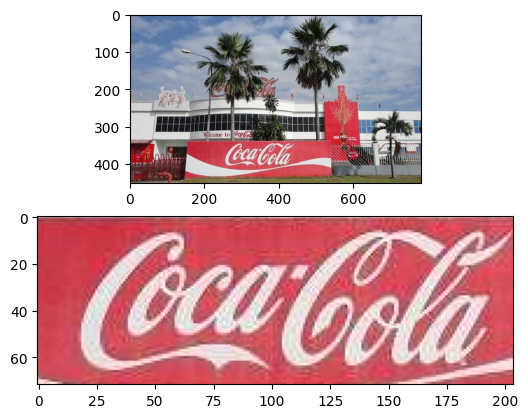

tensor([4], device='cuda:0')


In [149]:
pred = combine_2model("/content/real_test/coca-cola-0906.jpg")

In [147]:
print("Prediction : ",le.inverse_transform([pred]))

Prediction :  ['Cocacola']



0: 640x640 1 logo, 314.3ms
Speed: 2.8ms preprocess, 314.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


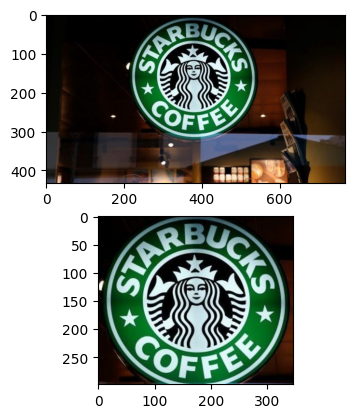

tensor([22], device='cuda:0')


array(['Starbucks'], dtype=object)

In [150]:
pred = combine_2model("/content/real_test/starbuck.jpg")
le.inverse_transform([pred])


0: 640x640 1 logo, 517.0ms
Speed: 4.7ms preprocess, 517.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


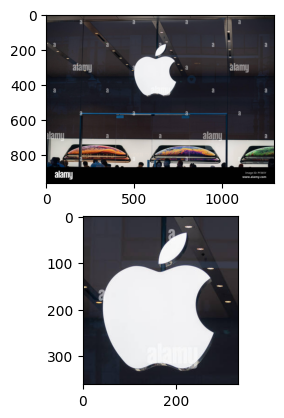

tensor([1], device='cuda:0')


array(['Apple'], dtype=object)

In [151]:
pred = combine_2model("/content/real_test/apple.jpg")
le.inverse_transform([pred])